In [1]:
#importing all necessary tools for dating visualization and cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
#Since the dataset has so many features, displaying max rows will give a better visual and understanding of variables
pd.options.display.max_rows
pd.options.display.max_rows = 500

## Quick views of the datasets

In [3]:
df1 = pd.read_csv('accepted_2007_to_2018Q4.csv')
df1.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df1.shape

(2260701, 151)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [6]:
df1.head().T

,0,1,2,3,4
id,68407277,68355089,68341763,66310712,68476807
member_id,NaN,NaN,NaN,NaN,NaN
loan_amnt,3600,24700,20000,35000,10400
funded_amnt,3600,24700,20000,35000,10400
funded_amnt_inv,3600,24700,20000,35000,10400
term,36 months,36 months,60 months,60 months,60 months
int_rate,13.99,11.99,10.78,14.85,22.45
installment,123.03,820.28,432.66,829.9,289.91
grade,C,C,B,C,F
sub_grade,C4,C1,B4,C5,F1


In [7]:
df2 = pd.read_csv("rejected_2007_to_2018Q4.csv")
df2.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0


In [8]:
df2.shape

(27648741, 9)

In [9]:
df2.head().T

,0,1,2,3,4
Amount Requested,1000,1000,11000,6000,1500
Application Date,2007-05-26,2007-05-26,2007-05-27,2007-05-27,2007-05-27
Loan Title,Wedding Covered but No Honeymoon,Consolidating Debt,Want to consolidate my debt,waksman,mdrigo
Risk_Score,693,703,715,698,509
Debt-To-Income Ratio,10%,10%,10%,38.64%,9.43%
Zip Code,481xx,010xx,212xx,017xx,209xx
State,NM,MA,MD,MA,MD
Employment Length,4 years,< 1 year,1 year,< 1 year,< 1 year
Policy Code,0,0,0,0,0


In [10]:
#extracting features most closely related to what I believe accepted loans are based off  (and factors of credit score)
#working with minimum null values
accepted = df1[['loan_amnt', 'term', 'int_rate',
                'grade', 'home_ownership', 'annual_inc', 
                'delinq_2yrs', 'verification_status',
                'dti', 'fico_range_high', 'open_acc'
]]

# loan_amnt - loan amount recieved 
# term - length of repayment.  36 or 60 months
# int_rate - interest rate on loan
# grade - loan grade 
# home_ownership - mortgage, rent, own, any, other, none 
# annual_inc - borrower's annual income
# delinq_2yrs - number of delinquencies within last 2 years 
# verification_status - not verified, verified, source verified
# dti - debt to interest ratio (percent)
# fico_range_high - assumed credit score 
# open_acc - number of credit acounts open

In [11]:
accepted.head()

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,delinq_2yrs,verification_status,dti,fico_range_high,open_acc
0,3600.0,36 months,13.99,C,MORTGAGE,55000.0,0.0,Not Verified,5.91,679.0,7.0
1,24700.0,36 months,11.99,C,MORTGAGE,65000.0,1.0,Not Verified,16.06,719.0,22.0
2,20000.0,60 months,10.78,B,MORTGAGE,63000.0,0.0,Not Verified,10.78,699.0,6.0
3,35000.0,60 months,14.85,C,MORTGAGE,110000.0,0.0,Source Verified,17.06,789.0,13.0
4,10400.0,60 months,22.45,F,MORTGAGE,104433.0,1.0,Source Verified,25.37,699.0,12.0


In [78]:
df2.isnull().sum()

Amount Requested               0
Application Date               0
Loan Title                  1303
Risk_Score              18497630
Debt-To-Income Ratio           0
Zip Code                     293
State                         22
Employment Length         951355
Policy Code                  918
dtype: int64

In [68]:
#Dropping Risk Score because over 65% of values are null
#18497630/27648741 = .67
#Relacing null values with a central measure of tendency will only damage data purity and integrity 

rejected = df2.drop('Risk_Score', axis=1)
rejected.head()

,Amount Requested,Application Date,Loan Title,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,9.43%,209xx,MD,< 1 year,0.0


In [13]:
accepted.dtypes

loan_amnt              float64
term                    object
int_rate               float64
grade                   object
home_ownership          object
annual_inc             float64
delinq_2yrs            float64
verification_status     object
dti                    float64
fico_range_high        float64
open_acc               float64
dtype: object

In [14]:
accepted.isnull().sum()

loan_amnt                33
term                     33
int_rate                 33
grade                    33
home_ownership           33
annual_inc               37
delinq_2yrs              62
verification_status      33
dti                    1744
fico_range_high          33
open_acc                 62
dtype: int64

In [15]:
accepted['verification_status'].value_counts()

Source Verified    886231
Not Verified       744806
Verified           629631
Name: verification_status, dtype: int64

<ipython-input-16-ff527ed633bf>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  accepted.hist(ax = ax)


array([[<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'int_rate'}>,
        <AxesSubplot:title={'center':'annual_inc'}>],
       [<AxesSubplot:title={'center':'delinq_2yrs'}>,
        <AxesSubplot:title={'center':'dti'}>,
        <AxesSubplot:title={'center':'fico_range_high'}>],
       [<AxesSubplot:title={'center':'open_acc'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

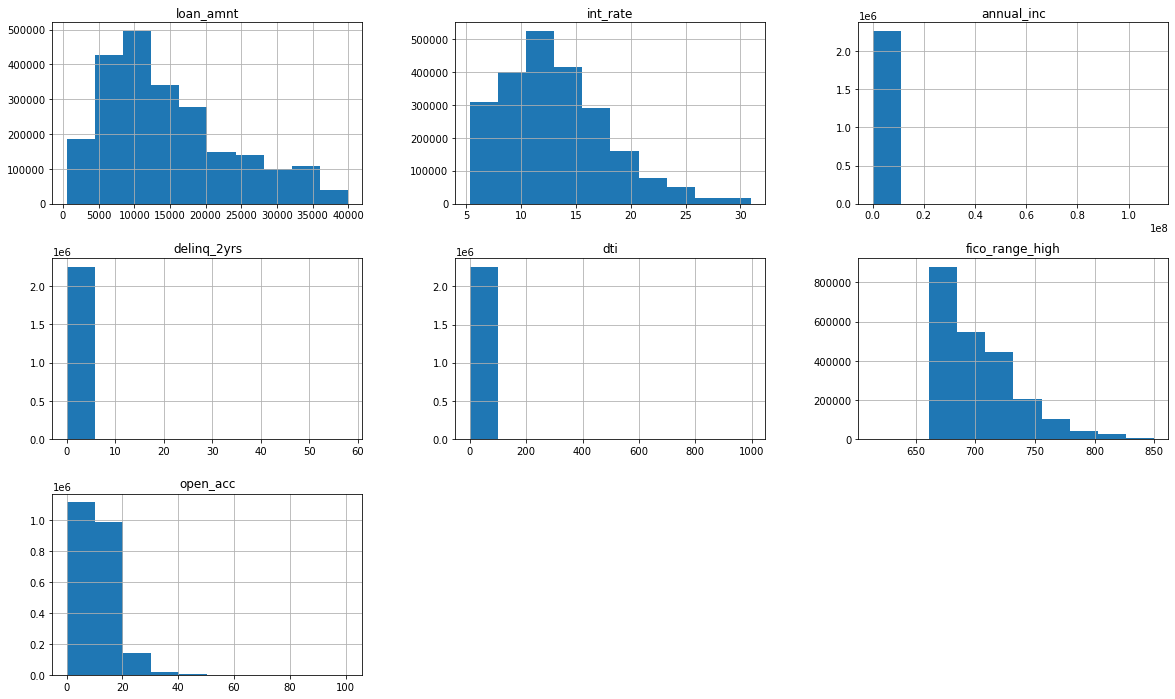

In [16]:
fig = plt.figure(figsize=(20,12))
ax = fig.gca()
accepted.hist(ax = ax)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


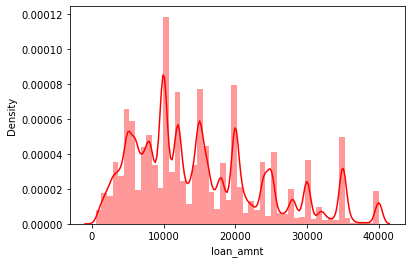

In [99]:
sns.distplot(accepted['loan_amnt'], color ='r')
plt.savefig('accepted_loan_amount.png')

In [93]:
accepted['loan_amnt'].mean()

15046.931227849467

In [85]:
accepted['int_rate'].min()

5.31

In [86]:
accepted['int_rate'].max()

30.99

In [84]:
accepted['int_rate'].mean()

13.092829114936396

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


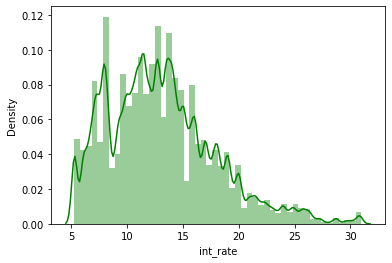

In [98]:
sns.distplot(accepted['int_rate'], color ='g')
plt.savefig('accepted_int_rate.png')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


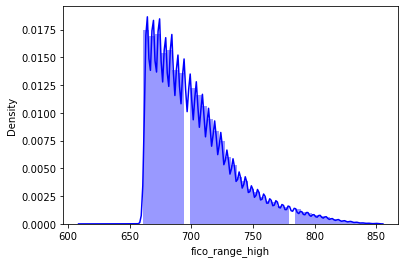

In [100]:
sns.distplot(accepted['fico_range_high'], color ='b')
plt.savefig('credit_score.png')

In [96]:
accepted['fico_range_high'].mean()

702.5883999773519

<AxesSubplot:>

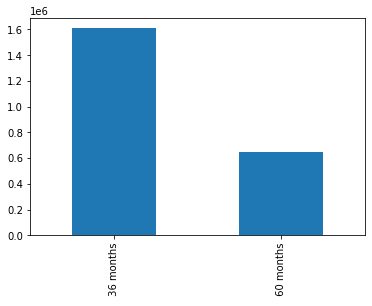

In [17]:
accepted['term'].value_counts().plot.bar()

<AxesSubplot:>

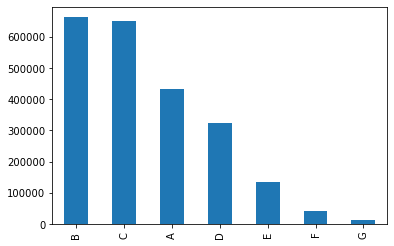

In [18]:
accepted['grade'].value_counts().plot.bar()

<AxesSubplot:>

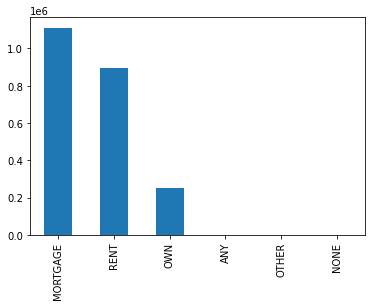

In [19]:
accepted['home_ownership'].value_counts().plot.bar()

In [20]:
accepted_corr = accepted.corr()
accepted_corr

,loan_amnt,int_rate,annual_inc,delinq_2yrs,dti,fico_range_high,open_acc
loan_amnt,1.000000,0.098082,0.197246,-0.009277,0.043542,0.110584,0.182229
int_rate,0.098082,1.000000,-0.050583,0.058909,0.124491,-0.415991,-0.010472
annual_inc,0.197246,-0.050583,1.000000,0.026134,-0.082619,0.037008,0.094377
delinq_2yrs,-0.009277,0.058909,0.026134,1.000000,-0.012212,-0.178910,0.048956
dti,0.043542,0.124491,-0.082619,-0.012212,1.000000,-0.027931,0.186124
fico_range_high,0.110584,-0.415991,0.037008,-0.178910,-0.027931,1.000000,0.018405
open_acc,0.182229,-0.010472,0.094377,0.048956,0.186124,0.018405,1.000000


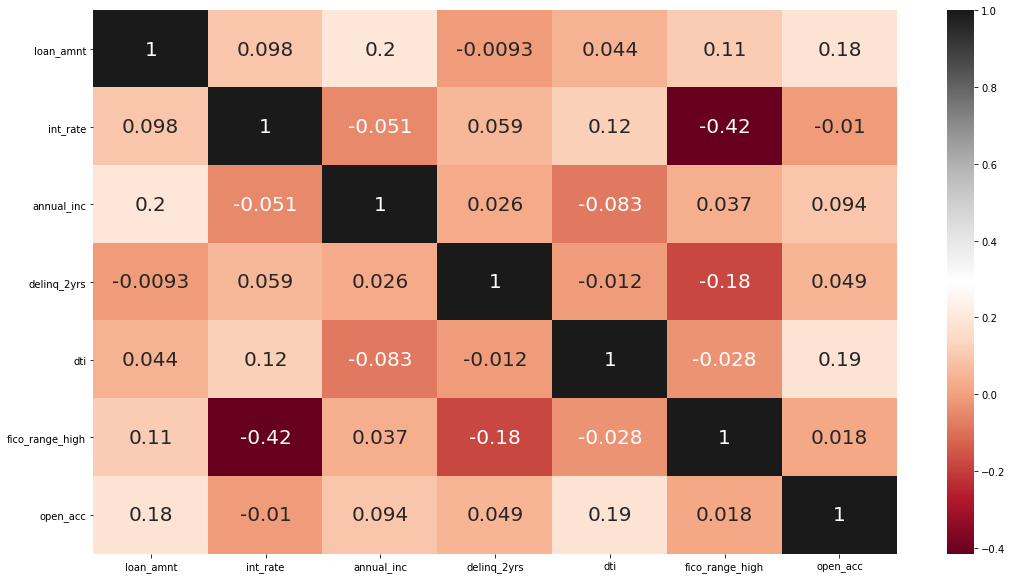

In [101]:
#Creating Subplots
plt.subplots(figsize = (18,10))
#Heatmap showing the correlation between powers 
sns.heatmap(accepted_corr, annot = True, annot_kws = {'size':20}, cmap="RdGy")
plt.savefig('accepted_corr_plot.png')

In [22]:
rejected.dtypes

Amount Requested        float64
Application Date         object
Loan Title               object
Debt-To-Income Ratio     object
Zip Code                 object
State                    object
Employment Length        object
Policy Code             float64
dtype: object

In [23]:
rejected.isnull().sum()

Amount Requested             0
Application Date             0
Loan Title                1303
Debt-To-Income Ratio         0
Zip Code                   293
State                       22
Employment Length       951355
Policy Code                918
dtype: int64

In [24]:
rejected.describe

<bound method NDFrame.describe of           Amount Requested Application Date                        Loan Title  \
0                   1000.0       2007-05-26  Wedding Covered but No Honeymoon   
1                   1000.0       2007-05-26                Consolidating Debt   
2                  11000.0       2007-05-27       Want to consolidate my debt   
3                   6000.0       2007-05-27                           waksman   
4                   1500.0       2007-05-27                            mdrigo   
...                    ...              ...                               ...   
27648736           10000.0       2016-12-31                Debt consolidation   
27648737           10000.0       2016-12-31                            moving   
27648738            1200.0       2016-12-31                             Other   
27648739           25000.0       2016-12-31                debt_consolidation   
27648740           15000.0       2016-12-31                          Busine

<AxesSubplot:>

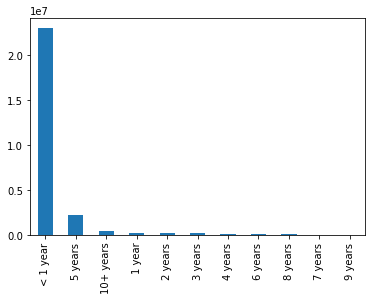

In [25]:
rejected['Employment Length'].value_counts().plot.bar()

In [70]:
rejected['Debt-To-Income Ratio'] = rejected['Debt-To-Income Ratio'].str.replace('%', '')
rejected['Debt-To-Income Ratio']

0              10
1              10
2              10
3           38.64
4            9.43
            ...  
27648736    41.26
27648737     1.48
27648738    10.26
27648739    17.71
27648740    10.58
Name: Debt-To-Income Ratio, Length: 27648741, dtype: object

In [30]:
rejected.head()

,Amount Requested,Application Date,Loan Title,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,10,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,10,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,10,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,38.64,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,9.43,209xx,MD,< 1 year,0.0


In [36]:
rejected['Amount Requested'].mean()

13133.240308610437

In [57]:
rejected['Debt-To-Income Ratio'].unique

<bound method Series.unique of 0           10.00
1           10.00
2           10.00
3           38.64
4            9.43
            ...  
27648736    41.26
27648737     1.48
27648738    10.26
27648739    17.71
27648740    10.58
Name: Debt-To-Income Ratio, Length: 27648741, dtype: float64>

In [56]:
print(rejected['Debt-To-Income Ratio'].skew())

3906.7998949046596


In [55]:
rejected['Debt-To-Income Ratio'].describe()

count    2.764874e+07
mean     1.433401e+02
std      1.053916e+04
min     -1.000000e+00
25%      8.060000e+00
50%      1.998000e+01
75%      3.661000e+01
max      5.000003e+07
Name: Debt-To-Income Ratio, dtype: float64

In [58]:
rejected.dtypes

Amount Requested        float64
Application Date         object
Loan Title               object
Debt-To-Income Ratio    float64
Zip Code                 object
State                    object
Employment Length        object
Policy Code             float64
dtype: object

In [71]:
rejected['Debt-To-Income Ratio'] = pd.to_numeric(rejected['Debt-To-Income Ratio'])

In [59]:
rejected.dtypes

Amount Requested        float64
Application Date         object
Loan Title               object
Debt-To-Income Ratio    float64
Zip Code                 object
State                    object
Employment Length        object
Policy Code             float64
dtype: object

In [60]:
print(rejected['Debt-To-Income Ratio'].quantile(0.10))
print(rejected['Debt-To-Income Ratio'].quantile(0.90))

0.77
66.84


In [72]:
rejected["Debt-To-Income Ratio"] = np.where(rejected["Debt-To-Income Ratio"] <.77, .77,rejected['Debt-To-Income Ratio'])
rejected["Debt-To-Income Ratio"] = np.where(rejected["Debt-To-Income Ratio"] >66.84, 66.84,rejected['Debt-To-Income Ratio'])
print(rejected['Debt-To-Income Ratio'].skew())

0.7676880438557842


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Debt-To-Income Ratio', ylabel='Density'>

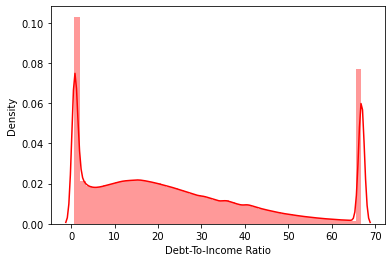

In [76]:
sns.distplot(rejected['Debt-To-Income Ratio'], color ='r')

In [91]:
accepted.to_csv('accepted_loans')

In [92]:
df2.to_csv('rejected_loans')